<a href="https://colab.research.google.com/github/mralamdari/YoloV3/blob/main/YoloV3_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```




Put this in the console , ctrl+shift+i

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Clone and build Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 22 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.10 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (10395/10395), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
#Build(make) Darknet
!make

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Yolo with COCO Dataset

## 2. Yolov3 Weights

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

## 3.Predict
    !./darknet detect <path to config> <path to weights> <path to image>

    imShow('predictions.jpg')



In [ ]:
!wget https://images.unsplash.com/photo-1583430999116-511887f6ee69?ixlib=rb-1.2.1&dl=donny-jiang-OWrC7nDbeM0-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb
!wget https://images.unsplash.com/photo-1483526682683-7560afbb5299?ixlib=rb-1.2.1&dl=elias-ehmann-eP93fjCLv4g-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb
!wget https://images.unsplash.com/photo-1520011554120-17c4c63fc213?ixlib=rb-1.2.1&dl=joseph-cooper-lEwc9W5eLH0-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

In [ ]:
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
download('predictions.jpg')

# GOOGLE DRIVE DOWNLOAD
!cp predictions.jpg /content/drive/MyDrive/Classroom/detection1.jpg

# Yolo with Custom Dataset

In [ ]:
%cd /content/darknet
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

In [ ]:
!pip3 install -r requirements.txt
!pip install awscli

In [ ]:
NUM_CLASSES=2
%cd OIDv4_ToolKit
!python3 main.py downloader --classes Traffic_sign Car --type_csv train --limit 5

In [ ]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Traffic sign
100% 5/5 [00:00<00:00, 22.70it/s]
Converting annotations for class: Car
100% 5/5 [00:00<00:00, 55.59it/s]


In [ ]:
class_names = os.listdir('/content/darknet/OIDv4_ToolKit/OID/Dataset/train')[0]
path = f'/content/darknet/OIDv4_ToolKit/OID/Dataset/train/{class_names}'
shutil.rmtree(f'{path}/Label')
os.rename('/content/darknet/OIDv4_ToolKit/OID/Dataset/train', '/content/darknet/data/obj')

'/content/darknet/OIDv4_ToolKit/OID/Dataset/train/Car_Person.zip'

#### 1.delete the old labels
#### 2.move pictures and it's new labels to darknet/data/obj folder

In [ ]:
# Current_path = '/content/darknet/OIDv4_ToolKit/'
classes_path = 'OID/Dataset/train/'
class_names = os.listdir(classes_path)
print(class_names)

#write class's names and remove the label folder in each class folder
with open('classes.txt', 'w+') as classes_file:
  for cls in class_names:
    classes_file.write(cls)
    shutil.rmtree(f'{classes_path}Label')

In [ ]:
class_names = os.listdir('/content/darknet/OIDv4_ToolKit/OID/Dataset/train')[0]
path = f'/content/darknet/OIDv4_ToolKit/OID/Dataset/train/{class_names}'
shutil.rmtree(f'{path}/Label')
os.rename(path, '/content/darknet/data/obj')

In [ ]:
with open('/content/darknet/OIDv4_ToolKit/classes.txt', 'w+') as classes_file:
  classes_file.write(class_names.replace('_', '\n'))

#Copy the classes name to obj.names
shutil.copy('/content/darknet/OIDv4_ToolKit/classes.txt', '/content/darknet/data/obj.names')

'/content/darknet/data/obj.names'

In [ ]:
with open('/content/darknet/cfg/yolov3.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[2] = '#'+config_files[2] # batch=1
config_files[3] = '#'+config_files[3] # subdivisions=1

config_files[5] = config_files[5][2:]  # batch=64
config_files[6] = config_files[6][2:]  # subdivisions=16


num_classes=1
max_batches = 4000 if num_classes==1 else num_classes*2000
config_files[19] = f'max_batches={max_batches}\n'
config_files[21] = f'steps={max_batches*8//10},{max_batches*9//10}\n'

In [ ]:
for i, j in enumerate(config_files):
    if j == '[yolo]\n':
        config_files[i-4] = f"filters={3*(5+num_classes)}\n" # convolutional filters
        config_files[i+3] = f"classes={num_classes}\n"       # yolo_classes
        config_files[i+8] = 'random=1\n'                     # yolo_random  0 or 1

In [ ]:
with open('/content/darknet/cfg/yolov3-custom.cfg', 'w+') as f:
    f.writelines(config_files)

In [ ]:
# #Obj details
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={num_classes}
  train=/content/darknet/data/train.txt
  valid=/content/darknet/data/test.txt
  names=/content/darknet/data/obj.names
  backup=/content/drive/MyDrive/yolo_backup
  """
  obj_data.write(odata)

In [ ]:
os.makedirs('/content/drive/MyDrive/yolo_backup', exist_ok=True)

In [ ]:
# write each image's location in train.txt
images_path = '/content/darknet/data/'
with open(f"{images_path}train.txt", 'w+') as train_file:
  for p in os.listdir(f'{images_path}obj'):
    if p.endswith('.jpg'):
      train_file.write('/content/darknet/data/obj/'+p+'\n')
  train_file.close()

#### Saved Data 20,000

In [ ]:
shutil.unpack_archive('/content/drive/MyDrive/Car_Person_20000.zip', '/content/darknet/data/obj')
# classes = {'Car':'0', 'Person': '1'}
for text_file in os.listdir('/content/darknet/data/obj'):
  if text_file.endswith('.txt'):
    with open(f'/content/darknet/data/obj/{text_file}', 'r') as f:
      texts = f.read()
      texts = texts.replace('Car', '0')
      texts = texts.replace('Person', '1')
      f.close()
      
    with open(f'/content/darknet/data/obj/{text_file}', 'w+') as t:
      t.write(texts)
      t.close()

In [ ]:
# shutil.unpack_archive('/content/drive/MyDrive/Car_Person_20000.zip', '/content/darknet/data/obj')
with open('/content/darknet/cfg/yolov3.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[2] = '#'+config_files[2] # batch=1
config_files[3] = '#'+config_files[3] # subdivisions=1

config_files[5] = config_files[5][2:]  # batch=64
config_files[6] = config_files[6][2:]  # subdivisions=16


num_classes=2
max_batches = num_classes*2000
config_files[19] = f'max_batches={max_batches}\n'
config_files[21] = f'steps={max_batches*8//10},{max_batches*9//10}\n'


for i, j in enumerate(config_files):
    if j == '[yolo]\n':
        config_files[i-4] = f"filters={3*(5+num_classes)}\n" # convolutional filters
        config_files[i+3] = f"classes={num_classes}\n"       # yolo_classes
        config_files[i+8] = 'random=1\n'                     # yolo_random  0 or 1
with open('/content/darknet/cfg/yolov3-custom.cfg', 'w+') as f:
    f.writelines(config_files)
os.makedirs('/content/drive/MyDrive/yolo_backup', exist_ok=True)

In [ ]:
os.makedirs('/content/drive/MyDrive/yolo_backup', exist_ok=True)

#sd

In [ ]:
os.path.exists('/content/darknet/data/obj/a6904ac58bb350db.jpg')

True

In [ ]:
# #Obj details
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={num_classes}
train=/content/darknet/data/train.txt
valid=/content/darknet/data/test.txt
names=/content/darknet/data/obj.names
backup=/content/drive/MyDrive/yolo_backup
  """
  obj_data.write(odata)

# os.rename('/content/Car/classes.txt', '/content/Car/obj.names')

#### download the pre trained weights of yolo

In [ ]:
#### download the pre trained weights of yolo
%cd /content/darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2022-09-08 04:05:38--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  16.7MB/s    in 10s     

2022-09-08 04:05:49 (15.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show
# !./darknet detector train /content/darknet/data/obj/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show

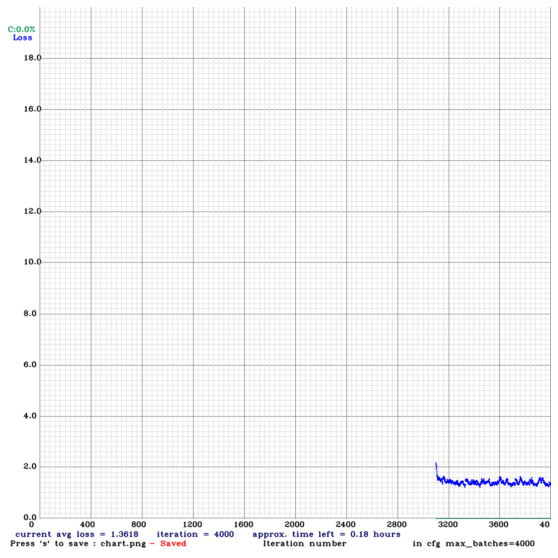

In [ ]:
imShow('chart.png')

In [ ]:
!./darknet detector train /content/darknet/data/obj/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_last.weights -dont_show

In [ ]:
with open('/content/darknet/cfg/yolov3-custom.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[5] = '#'+config_files[5] 
config_files[6] = '#'+config_files[6] 

config_files[2] = config_files[2][2:]  
config_files[3] = config_files[3][2:]  



with open('/content/darknet/cfg/yolov3-custom.cfg', 'r+') as f:
    f.writelines(config_files)

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_final.weights /content/5.jpg -thresh 0.5 -dont_show

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
batch: Using default '1'
subdivisions: Using default '1'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1

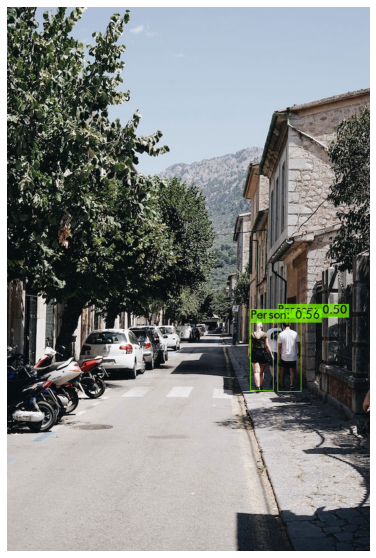

In [ ]:
imShow('predictions.jpg')

In [ ]:
%cd /content
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4
!wget https://vod-progressive.akamaized.net/exp=1662630862~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F1313%2F18%2F456569920%2F2014612057.mp4~hmac=38c92b106ff7ddc52854d3b286e76edf02a887494b64c59da8752bb4f1154eb2/vimeo-prod-skyfire-std-us/01/1313/18/456569920/2014612057.mp4
!wget https://vod-progressive.akamaized.net/exp=1662635340~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F1617%2F12%2F308086081%2F1184097267.mp4~hmac=ed60d692a5dc812727624894098b7329ecc13c22c26d1893a194129a362bac31/vimeo-prod-skyfire-std-us/01/1617/12/308086081/1184097267.mp4
!wget https://vod-progressive.akamaized.net/exp=1662635660~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F2506%2F14%2F362531794%2F1490031016.mp4~hmac=b961dd8fc8bc2e6a9f59537be61941cacd0bf053e444783d9fb2d20747603bd7/vimeo-prod-skyfire-std-us/01/2506/14/362531794/1490031016.mp4

In [ ]:
%cd /content/darknet

output_video = '/content/results.avi'

!./darknet detector demo /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_final.weights /content/1490031016.mp4 -dont_show -i 0 -out_filename $output_video

In [ ]:
imShow('predictions.mp4')
# ./darknet detector demo ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights test50.mp4 -i 0 -thresh 0.25

!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights $input_video -dont_show -i 0 -out_filename $output_video